In [231]:
import numpy as np
import pandas as pd
import cvxopt
from sklearn.preprocessing import MinMaxScaler

from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error

import time
import matplotlib.pyplot as plt

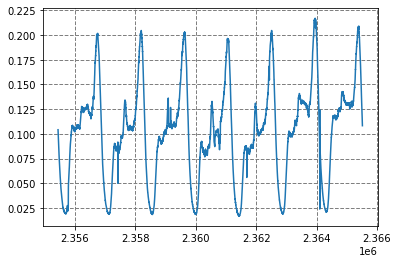

In [307]:
df = pd.read_csv('./train.csv')
kpi_id = '9ee5879409dccef9'
plt = df.query('`KPI ID`==@kpi_id').query('timestamp > 1493568000 and timestamp < 1493568000 + 7 * 24 * 60 * 60')['value'].plot.line()
plt.grid(axis='x', linestyle='--', linewidth=1, color='gray')  # 显示竖直的网格线
plt.grid(axis='y', linestyle='--', linewidth=1, color='gray')  # 显示水平的网格线

In [151]:
# 1. 正则化
series = df.query('`KPI ID`==@kpi_id').query('timestamp > 1493568000 and timestamp < 1493568000 + 3 * 24 * 60 * 60')['value']
scaler = MinMaxScaler(feature_range=(0, 1))
scaled = scaler.fit_transform(series.to_numpy().reshape(-1,1))

<AxesSubplot:>

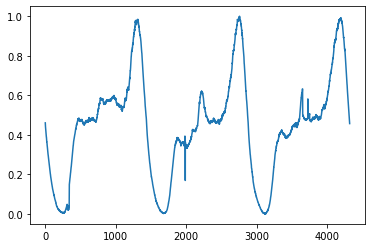

In [152]:
pd.Series(scaled.reshape(-1)).plot.line()

In [153]:
# 2. 滑动窗口
sequence_length = 60
train_test_boundary = int(0.67 * scaled.shape[0])

d = []
for i in range(scaled.shape[0] - sequence_length):
    d.append(scaled[i: i + sequence_length + 1].tolist())
d = np.array(d)

X_train, y_train = d[:train_test_boundary,:-1], d[:train_test_boundary,-1]
X_test,  y_test  = d[train_test_boundary:,:-1], d[train_test_boundary:,-1]

In [266]:
# 3. 模型拟合
# svr_pred,duration_svr                                   = eps_svr(X_train[:, :, 0], y_train, X_test[:, :, 0], 0.1, 2, 0.25)
# lssvr_pred,alpha,bias,duration_lssvr                    = lssvr(X_train[:, :, 0], y_train, X_test[:, :, 0], 0.25)
lstsvr_pred,lstsvr_pred_l,lstsvr_pred_u,duration_lstsvr = lstsvr(X_train[:, :, 0], y_train, X_test[:, :, 0], 0.05, 0.05, 0.25)

c:\users\carolina\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:3: DeprecationWarning: time.clock has been deprecated in Python 3.3 and will be removed from Python 3.8: use time.perf_counter or time.process_time instead
  This is separate from the ipykernel package so we can avoid doing imports until
c:\users\carolina\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:27: DeprecationWarning: time.clock has been deprecated in Python 3.3 and will be removed from Python 3.8: use time.perf_counter or time.process_time instead


In [2]:
pd.Series(lstsvr_pred.reshape(-1)).plot.line()

NameError: name 'pd' is not defined

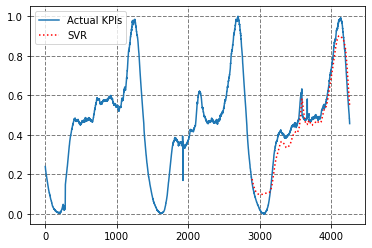

In [302]:
# 4. 可视化
# 4.1. SVR
observed = np.append(y_train, y_test)
predict = svr_pred

x_observed = np.arange(0, len(observed))
x_predict  = np.arange(0, len(predict)) + len(y_train)

plt.plot()
plt.plot(x_observed, observed,    label='Actual KPIs')
plt.plot(x_predict,  predict,'r:',label='SVR')
plt.legend()
plt.grid(axis='x', linestyle='--', linewidth=1, color='gray')  # 显示竖直的网格线
plt.grid(axis='y', linestyle='--', linewidth=1, color='gray')  # 显示水平的网格线

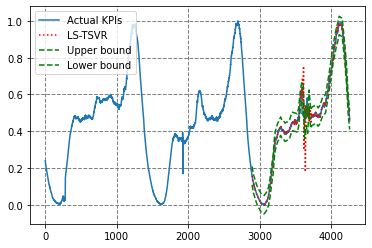

In [303]:
# 4.2. SVR
observed = np.append(y_train, y_test)
predict = lstsvr_pred

x_observed = np.arange(0, len(observed))
x_predict  = np.arange(0, len(predict)) + len(y_train)

plt.plot()
plt.plot(x_observed, observed,    label='Actual KPIs')
plt.plot(x_predict[0::5],  predict[0::5],'r:',label='LS-TSVR')
plt.plot(x_predict[0::21],  lstsvr_pred_u[0::21],'g--',label='Upper bound')
plt.plot(x_predict[0::21],  lstsvr_pred_l[0::21],'g--',label='Lower bound')
plt.legend()
plt.grid(axis='x', linestyle='--', linewidth=1, color='gray')  # 显示竖直的网格线
plt.grid(axis='y', linestyle='--', linewidth=1, color='gray')  # 显示水平的网格线

c:\users\carolina\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:18: UserWarning: Attempting to set identical bottom == top == 0.05 results in singular transformations; automatically expanding.


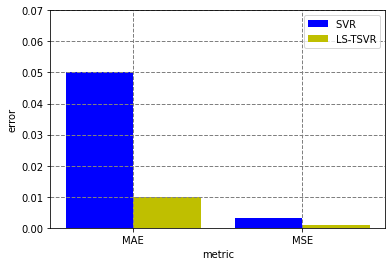

In [1]:
#4.3. Bar Chart
#柱状图
import numpy as np
import matplotlib.pyplot as plt
SVR = [0.05,0.003]
LS_TSVR = [0.01,0.001]
x = np.arange(2) #总共有几组，就设置成几，我们这里有三组，所以设置为3
total_width, n = 0.8, 2    # 有多少个类型，只需更改n即可，比如这里我们对比了四个，那么就把n设成4
width = total_width / n
x = x - (total_width - width) / 2
plt.bar(x, SVR, color = "b",width=width,label='SVR ')
plt.bar(x + width, LS_TSVR, color = "y",width=width,label='LS-TSVR')
plt.xlabel("metric")
plt.ylabel("error")
plt.legend(loc = "best")
plt.xticks([0,1],['MAE','MSE'])
my_y_ticks = np.arange(0, 0.07, 0.01)
plt.ylim((0.05, 0.05))
plt.yticks(my_y_ticks)
plt.grid(axis='x', linestyle='--', linewidth=1, color='gray')  # 显示竖直的网格线
plt.grid(axis='y', linestyle='--', linewidth=1, color='gray')  # 显示水平的网格线
plt.show()

In [ ]:
# 5.1. MAE
# MAE(Mean Absolute Error)

In [226]:
mean_absolute_error(y_test, svr_pred)

0.05120803447950689

In [227]:
mean_absolute_error(y_test, lstsvr_pred)

0.013700973398738783

In [ ]:
# 5.2. MSE
# MSE(Mean Squared Error)

In [228]:
mean_squared_error(y_test, svr_pred)

0.0032400699831707756

In [229]:
mean_squared_error(y_test, lstsvr_pred)

0.0018292846131930612

In [223]:
# 5.3. Time Consumed/sec

224.68376289999833

In [224]:
duration_svr

224.68376289999833

In [225]:
duration_lstsvr

146.11927189999915

以下为算法：

SVR

In [139]:
def kernel(x,y,gamma):
    return np.exp(-(np.sum((x-y)**2)*gamma))

def eps_svr(X_train, Y_train, X_test, epsilon, c, kernel_param):
    
    t_start = time.clock()
    
    """implements the CVXOPT version of epsilon SVR"""
    m, n = X_train.shape      #m is num samples, n is num features
    #Finding the kernels i.e. k(x,x')
    k = np.zeros((m,m))
    for i in range(m):
        for j in range(m):
            k[i][j] = kernel(X_train[i,:], X_train[j,:], kernel_param)
    
    P= np.hstack((k,-1*k))
    P= np.vstack((P,-1*P))
    q= epsilon*np.ones((2*m,1))
    qadd=np.vstack((-1*Y_train,Y_train))
    q=q+qadd
    A=np.hstack((np.ones((1,m)),-1*(np.ones((1,m)))))
    
    #define matrices for optimization problem       
    P = cvxopt.matrix(P)
    q = cvxopt.matrix(q)
    A = cvxopt.matrix(A)
    b = cvxopt.matrix(np.zeros((1,1)))
    
    c= float(c)
    temp=np.vstack((np.eye(2*m),-1*np.eye(2*m)))
    G=cvxopt.matrix(temp)
    
    temp=np.vstack((c*np.ones((2*m,1)),np.zeros((2*m,1))))
    h = cvxopt.matrix(temp)
    #solve the optimization problem
    sol = cvxopt.solvers.qp(P,q,G,h,A,b,solver='glpk')
    #lagrange multipliers
    l = np.ravel(sol['x'])
    #extracting support vectors i.e. non-zero lagrange multiplier
    alpha=l[0:m]
    alpha_star=l[m:]
    
    bias= sol['y']
    print("bias="+str(bias))
    #find weight vector and predict y
    Y_pred = np.zeros(len(X_test))
    for i in range(len(X_test)):
        res=0
        for u_,v_,z in zip(alpha,alpha_star,X_train):
            res+=(u_ - v_)*kernel(X_test[i],z,kernel_param)
        Y_pred[i]= res
    Y_pred = Y_pred+bias[0,0]
    
    t_end = time.clock()
    
    return Y_pred, (t_end - t_start)

LSSVR

In [140]:
def lssvr(X_train, Y_train, X_test, kernel_param):
    
    t_start = time.clock()
    
    m, n = X_train.shape      #m is num samples, n is num features
    #Finding the kernels i.e. k(x,x')
    k = np.zeros((m,m))
    for i in range(m):
        for j in range(m):
            k[i][j] = kernel(X_train[i,:], X_train[j,:], kernel_param)
    
    temp_v = np.row_stack((np.ones(m), k))
    temp_h = np.row_stack(([0],np.ones((m,1))))
    A = np.column_stack((temp_h,temp_v ) )
    temp_b = np.row_stack(([0],Y_train))
    params =  np.dot( np.linalg.pinv(A),temp_b )
    alpha = params[1:]
    bias = params[0]
    Y_pred = np.zeros(len(X_test))
    for i in range(len(X_test)):
        res=0
        for u_,z in zip(alpha, X_train):
            res+=u_*kernel(X_test[i],z,kernel_param)
        Y_pred[i]= res
    Y_pred = Y_pred+bias
    
    t_end = time.clock()
    
    return Y_pred,alpha,bias, t_end - t_start

LSTSVR

In [210]:
def lstsvr(X_train, Y_train, X_test, eps1, eps2, kernel_param):
    
    m, n = X_train.shape      #m is num samples, n is num features
    
    Y_pred,alpha,bias,duration_lssvr = lssvr(X_train, Y_train, X_test, 0.25)
    
    Y_pred_l,alpha_l,bias_l,duration_lssvr_l = lssvr(X_train, Y_train - eps1, X_test, 0.25)
    
    Y_pred_u,alpha_u,bias_u,duration_lssvr_u = lssvr(X_train, Y_train + eps2, X_test, 0.25)
    
    return Y_pred,Y_pred_l,Y_pred_u, duration_lssvr

以下为算法的测试代码：

In [203]:
X = np.array([1, 1])
X = np.row_stack((X, np.array([1, 2])))
X = np.row_stack((X, np.array([2, 1])))
X = np.row_stack((X, np.array([2, 2])))

Y = np.array([[2, 3, 3, 4]]).T

SVR

In [142]:
Yt_svr,duration_svr = eps_svr(X, Y, X, 0.1, 2, 0.25)

     pcost       dcost       gap    pres   dres
 0: -4.7263e-01 -2.1944e+01  2e+01  3e-17  2e-16
 1: -1.1368e+00 -2.8097e+00  2e+00  1e-16  2e-16
 2: -1.8447e+00 -2.0760e+00  2e-01  4e-16  1e-16
 3: -2.0148e+00 -2.0274e+00  1e-02  7e-16  9e-17
 4: -2.0259e+00 -2.0261e+00  2e-04  2e-16  1e-16
 5: -2.0261e+00 -2.0261e+00  2e-06  4e-16  1e-16
 6: -2.0261e+00 -2.0261e+00  2e-08  2e-16  1e-16
Optimal solution found.
bias=[ 3.00e+00]



c:\users\carolina\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:6: DeprecationWarning: time.clock has been deprecated in Python 3.3 and will be removed from Python 3.8: use time.perf_counter or time.process_time instead
  
c:\users\carolina\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:54: DeprecationWarning: time.clock has been deprecated in Python 3.3 and will be removed from Python 3.8: use time.perf_counter or time.process_time instead


In [143]:
Yt_svr

array([2.21306135, 3.        , 3.        , 3.78693865])

In [144]:
duration_svr

0.011149300000397488

LSSVR

In [204]:
Yt_lssvr,alpha,bias,duration_lssvr = lssvr(X, Y, X, 0.25)

c:\users\carolina\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:3: DeprecationWarning: time.clock has been deprecated in Python 3.3 and will be removed from Python 3.8: use time.perf_counter or time.process_time instead
  This is separate from the ipykernel package so we can avoid doing imports until
c:\users\carolina\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:27: DeprecationWarning: time.clock has been deprecated in Python 3.3 and will be removed from Python 3.8: use time.perf_counter or time.process_time instead


In [207]:
Yt_lssvr

array([2., 3., 3., 4.])

In [43]:
alpha

array([[-2.54149408e+00],
       [ 0.00000000e+00],
       [-3.55271368e-15],
       [ 2.54149408e+00]])

In [44]:
bias

array([3.])

LSTSVR

In [211]:
Yt_lstsvr,Yt_lstsvr_l, Yt_lstsvr_u,duration_lstsvr = lstsvr(X, Y, X, 0.05, 0.05, 0.25)

c:\users\carolina\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:3: DeprecationWarning: time.clock has been deprecated in Python 3.3 and will be removed from Python 3.8: use time.perf_counter or time.process_time instead
  This is separate from the ipykernel package so we can avoid doing imports until
c:\users\carolina\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:27: DeprecationWarning: time.clock has been deprecated in Python 3.3 and will be removed from Python 3.8: use time.perf_counter or time.process_time instead


In [212]:
Yt_lstsvr

array([2., 3., 3., 4.])

In [213]:
Yt_lstsvr_l

array([1.95, 2.95, 2.95, 3.95])

In [214]:
Yt_lstsvr_u

array([2.05, 3.05, 3.05, 4.05])

■